In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [8]:
raw_data = pd.read_csv("temp_data.txt", delimiter=',',skiprows=19)

In [9]:
raw_data

,SOUID,DATE,TG,Q_TG
0,111448,19790101,-119,0
1,111448,19790102,-93,0
2,111448,19790103,-78,0
3,111448,19790104,-96,0
4,111448,19790105,-99,0
...,...,...,...,...
15336,111448,20201227,16,0
15337,111448,20201228,28,0
15338,111448,20201229,23,0
15339,111448,20201230,25,0


In [53]:
raw_data.columns = ['id', 'date', 'temp', 'quality']

raw_data.head()

,id,date,temp,quality
0,111448,19790101,-119,0
1,111448,19790102,-93,0
2,111448,19790103,-78,0
3,111448,19790104,-96,0
4,111448,19790105,-99,0


In [54]:
raw_data['id'].unique()

array([111448])

In [55]:
raw_data['quality'].value_counts()

0    15341
Name: quality, dtype: int64

In [56]:
raw_data.drop(['id', 'quality'], axis=1, inplace=True)

raw_data.head()

,date,temp
0,19790101,-119
1,19790102,-93
2,19790103,-78
3,19790104,-96
4,19790105,-99


In [57]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    15341 non-null  int64
 1   temp    15341 non-null  int64
dtypes: int64(2)
memory usage: 239.8 KB


In [58]:
raw_data['date'] = raw_data['date'].astype(str)

raw_data['date'] = pd.to_datetime(raw_data['date'])

raw_data.head()

,date,temp
0,1979-01-01,-119
1,1979-01-02,-93
2,1979-01-03,-78
3,1979-01-04,-96
4,1979-01-05,-99


In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15341 non-null  datetime64[ns]
 1   temp    15341 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 239.8 KB


In [39]:
data = raw_data.set_index("date")

data.head()

,temp
date,
1979-01-01,-119
1979-01-02,-93
1979-01-03,-78
1979-01-04,-96
1979-01-05,-99


In [41]:
data['temp_c'] = data['temp']*0.1

<AxesSubplot:xlabel='date'>

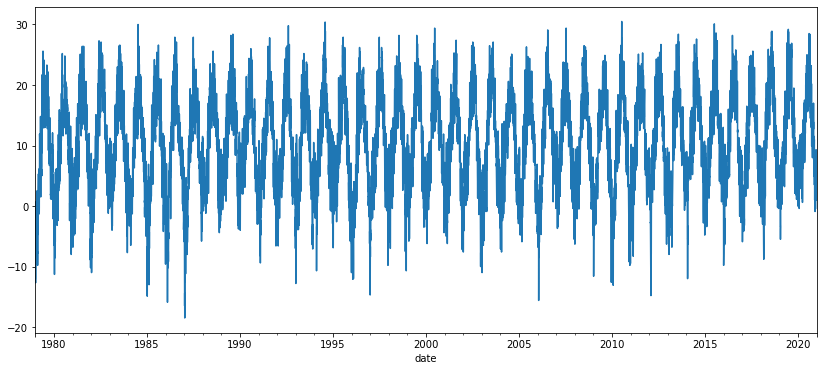

In [43]:
data['temp_c'].plot()

In [44]:
# divide into train and test

data_train = data.loc[:'2016']

data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13880 entries, 1979-01-01 to 2016-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    13880 non-null  int64  
 1   temp_c  13880 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 325.3 KB


In [45]:
data_train.to_csv("temp_train.csv")

In [46]:
data_test = data.loc['2017':]
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-01-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1461 non-null   int64  
 1   temp_c  1461 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 34.2 KB


In [59]:
data_test.to_csv("temp_test.csv")